In [1]:
import numpy as np
import pandas as pd
import warnings

warnings.filterwarnings('ignore')


In [2]:
# Generating synthetic data
np.random.seed(0)
data_size = 200
features = np.random.rand(data_size, 2)  # Two features: visit duration and pages visited
labels = (features[:, 0] + features[:, 1] > 1).astype(int)  # Purchase (1) or not (0)


In [3]:
# Convert to DataFrame for easier manipulation
df = pd.DataFrame(features, columns=['VisitDuration', 'PagesVisited'])
df['Purchase'] = labels
df

,VisitDuration,PagesVisited,Purchase
0,0.548814,0.715189,1
1,0.602763,0.544883,1
2,0.423655,0.645894,1
3,0.437587,0.891773,1
4,0.963663,0.383442,1
...,...,...,...
195,0.062713,0.424032,0
196,0.258684,0.849038,1
197,0.033305,0.958983,0
198,0.355369,0.356707,0


In [4]:
from sklearn.model_selection import train_test_split

# Split the data
X_train, X_test, y_train, y_test = train_test_split(df[['VisitDuration', 'PagesVisited']], df['Purchase'], test_size=0.2, random_state=42)

In [5]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense


2024-09-30 21:44:52.753471: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:479] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-09-30 21:44:57.957103: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:10575] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-09-30 21:44:58.014245: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1442] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-09-30 21:45:05.233383: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-09-30 21:45:14.332723: W tensorflow/com

In [6]:
# Define the model
model = Sequential([
    Dense(10, activation='relu', input_shape=(2,)),  # Input layer with 2 features
    Dense(1, activation='sigmoid')  # Output layer with sigmoid activation for binary classification
])

2024-09-30 21:45:21.944634: E external/local_xla/xla/stream_executor/cuda/cuda_driver.cc:282] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected


In [7]:
# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


In [8]:
# Train the model
# model.fit(X_train, y_train, epochs=10, batch_size=10)


Epoch 1/10
16/16 [==============================] - 17s 4ms/step - loss: 0.6888 - accuracy: 0.5500
Epoch 2/10
16/16 [==============================] - 0s 2ms/step - loss: 0.6836 - accuracy: 0.6125
Epoch 3/10
16/16 [==============================] - 0s 3ms/step - loss: 0.6781 - accuracy: 0.7000
Epoch 4/10
16/16 [==============================] - 0s 2ms/step - loss: 0.6733 - accuracy: 0.7250
Epoch 5/10
16/16 [==============================] - 0s 2ms/step - loss: 0.6688 - accuracy: 0.7375
Epoch 6/10
16/16 [==============================] - 0s 2ms/step - loss: 0.6641 - accuracy: 0.7188
Epoch 7/10
16/16 [==============================] - 0s 2ms/step - loss: 0.6590 - accuracy: 0.7000
Epoch 8/10
16/16 [==============================] - 0s 3ms/step - loss: 0.6542 - accuracy: 0.7125
Epoch 9/10
16/16 [==============================] - 0s 2ms/step - loss: 0.6491 - accuracy: 0.7188
Epoch 10/10
16/16 [==============================] - 0s 2ms/step - loss: 0.6442 - accuracy: 0.7312


In [9]:
# Evaluate the model on the test set
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {accuracy}")

2/2 [==============================] - 0s 8ms/step - loss: 0.6252 - accuracy: 0.8000
Test Accuracy: 0.800000011920929


In [10]:
# Train the model and save the history
history = model.fit(X_train, y_train, epochs=10, batch_size=10, validation_split=0.2)


Epoch 1/10
13/13 [==============================] - 1s 8ms/step - loss: 0.6433 - accuracy: 0.7266 - val_loss: 0.6208 - val_accuracy: 0.8125
Epoch 2/10
13/13 [==============================] - 0s 4ms/step - loss: 0.6396 - accuracy: 0.7344 - val_loss: 0.6166 - val_accuracy: 0.8438
Epoch 3/10
13/13 [==============================] - 0s 4ms/step - loss: 0.6350 - accuracy: 0.7500 - val_loss: 0.6117 - val_accuracy: 0.8438
Epoch 4/10
13/13 [==============================] - 0s 6ms/step - loss: 0.6311 - accuracy: 0.7656 - val_loss: 0.6066 - val_accuracy: 0.8438
Epoch 5/10
13/13 [==============================] - 0s 6ms/step - loss: 0.6266 - accuracy: 0.7812 - val_loss: 0.6015 - val_accuracy: 0.8438
Epoch 6/10
13/13 [==============================] - 0s 4ms/step - loss: 0.6225 - accuracy: 0.8281 - val_loss: 0.5970 - val_accuracy: 0.8438
Epoch 7/10
13/13 [==============================] - 0s 6ms/step - loss: 0.6180 - accuracy: 0.8516 - val_loss: 0.5918 - val_accuracy: 0.8750
Epoch 8/10
13/13 [==

In [11]:
# Plotting training and validation loss and accuracy
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 5))


<Figure size 1200x500 with 0 Axes>

<Figure size 1200x500 with 0 Axes>

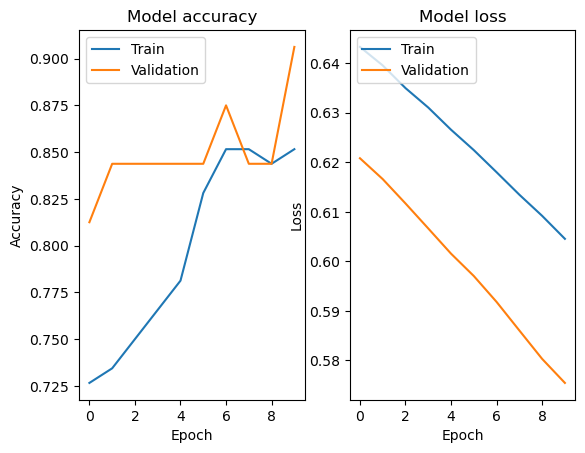

In [12]:
# Plot training & validation accuracy values
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.show()


313/313 [==============================] - 0s 1ms/step


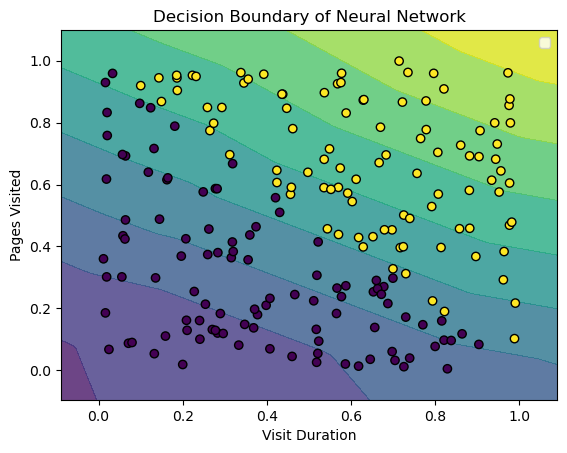

In [14]:
# Generate a grid over the feature space
x_min, x_max = df['VisitDuration'].min() - 0.1, df['VisitDuration'].max() + 0.1
y_min, y_max = df['PagesVisited'].min() - 0.1, df['PagesVisited'].max() + 0.1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))

# Predict over the grid
Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot the contour and training examples
plt.contourf(xx, yy, Z, alpha=0.8)
plt.scatter(df['VisitDuration'], df['PagesVisited'], c=df['Purchase'], edgecolor='k')
plt.xlabel('Visit Duration')
plt.ylabel('Pages Visited')
plt.title('Decision Boundary of Neural Network')
plt.legend()
plt.show()